<a href="https://colab.research.google.com/github/vinigoia/MODELO-PARA-CLASSIFICACAO-DE-SAUDE-FETAL/blob/main/MODELO_PARA_CLASSIFICA%C3%87%C3%83O_DE_SA%C3%9ADE_DE_FETOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO PARA CLASSIFICAÇÃO DE SAÚDE DE FETOS**

_______________________________________________________________________________

## ***Se você está com pressa!!!***
________________________________________________________________________________

O principal objetivo deste estudo é testar a ferramenta Pycaret para um fluxo de trabalho. Nele, você encontrará uma análise de exploração de dados de um dataset e o *workflow* da ferramenta, com conclusões sobre a praticidade do uso de auto machine learning para um problema de classificação.

## ***Contextualizando...***

_______________________________________________________________________________

Resumidamente, auto machine learning é uma técnica auxiliada por ferramentas que tem o intuito de otimizar a preparação dos dados para aplicação de machine learning, além de conseguir realizar de forma automática validações cruzadas de diversos algoritmos. Dessa maneira, o cientista de dados centraliza seus esforços nas análises exploratórias e na escolha de parâmetros para melhor desempenho.
_______________________________________________________________________________

<p align=center>
<img src="https://img.freepik.com/free-photo/designer-using-transparent-digital-tablet-screen-futuristic-technology_53876-105379.jpg?t=st=1676029106~exp=1676029706~hmac=455598cc9f66dc05296c054fe7773e1539f0dc45dbf58afbeb38afa6c6f7b642" width="60%"></p>

_______________________________________________________________________________
A ferramenta que utilizaremos aqui é o Pycaret, que segundo o próprio site, é uma biblioteca simples, fácil de aprender e *low code*. Basicamente é dividida em 4 módulos: Machine Learning Supervisionado, Machine Learning Não Supervisionado, Séries Temporais (Beta) e Datasets.

Para esse estudo, utilizaremos o Pycaret para a Classificação de Saúde de Fetos, ou seja, ciência de dados e machine learning na área médica.

Prevendo esses valores, tem-se uma maior agilidade e acurácia no diagnóstico de qualquer problema com o feto, auxiliando médicos a tomarem decisões referentes a tratativas do problema.

Iniciaremos nossos estudos importando as bibliotecas necessárias e salvando o *dataset* em uma variável. Também veremos as primeiras entradas da tabela.

Os dados podem ser encontrados nesse [link](https://raw.githubusercontent.com/vinigoia/MODELO-PARA-CLASSIFICACAO-DE-SAUDE-FETAL/main/fetal_health.csv").

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Salvando o dataset em uma variável
df = pd.read_csv("https://raw.githubusercontent.com/vinigoia/MODELO-PARA-CLASSIFICACAO-DE-SAUDE-FETAL/main/fetal_health.csv")

In [3]:
# Visualização das primeiras entradas
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## ***Sobre os Dados***
______________________________________________________________________________
A redução da mortalidade infantil está presente em diversos objetivos do Programa de Desenvolvimento Sutentável das Nações Unidas e é um índice de progresso humano. Espera-se que até 2030, países consigam reduzir as mortes de crianças de até 5 anos para, pelo menos, 25 a cada 1000 nascidos vivos.

Paralelo a isso, as mortes das mães atingem um número alto, chegando a 295000 óbitos durante a gravidez e no momento do nascimento (dados do ano de 2017). 94% dessas mortes ocorreram em locais com poucos recursos e a maioria poderia ser evitada.

Os dados utilizados neste projeto foram originalmente disponibilizados no [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification). Consistem, basicamente, em dados extraídos de exames de cardiotocografia e classificados por 3 obstetras especialistas. Os equipamentos utilizados para exame são simples e de baixo custo, e funcionam através do envio de pulsos de ultrassom, possibilitando a leitura dos batimentos cardíacos dos fetos, movimentos, contrações, etc.


### **Dicionário de Variáveis**
______________________________________________________

Sendo assim, as variáveis disponíveis no *dataset* são:

* `baseline value` : frequência Cardíaca Fetal Basal;

* `accelerations` : aceleração por segundo;

* `fetal_movement` : número de movimentos do feto por segundo;

* `uterine_contractions` : número de contrações uterinas por segundo;

* `light_decelerations` : número de desaceleração leve por segundo;

* `severe_decelerations` : número de desaceleração severa por segundo;

* `prolongued_decelerations` : número de desaceleração prolongada por segundo;

* `abnormal_short_term_variability` : porcentagem de tempo com variabilidade anormal de curto prazo;

* `mean_value_of_short_term_variability` : valor médio da variabilidade de curto prazo;

* `percentage_of_time_with_abnormal_long_term_variability` : porcentagem de tempo com variabilidade anormal de longo prazo;

* `mean_value_of_long_term_variability` : valor médio da variabilidade de longo prazo;

* `histogram_width` : largura do histograma feito usando todos os valores de um registro;

* `histogram_min` : valores mínimos do histograma;

* `histogram_max` : valores máximos do histograma;

* `histogram_number_of_peaks` : número de picos no histograma do exame;

* `histogram_number_of_zeroes` : número de zeros no histograma do exame;

* `histogram_mode` : modo do histograma;

* `histogram_mean` : média do histograma;

* `histogram_median` : mediana do histograma;

* `histogram_variance` : variância do histograma;

* `histogram_tendency` : tendência do histograma;

* `fetal_health` : saúde fetal, sendo 1 para Normal, 2 para Suspeito e 3 para Patológico.

## ***Análise Exploratória***
______________________________________________________



### **O primeiro contato**
______________________________________________________

Antes de começar qualquer análise, iremos utilizar alguns métodos para verificação de informações básicas do *dataset*, como valores médios, valores ausentes, e os tipos de variáveis presentes.

In [ ]:
# Descrição geral do dataset
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


A princípio, percebe-se que os dados estão equilibrados. Vamos verificar o tipo de variável presente em cada atributo, bem como a presença de valores ausentes.

In [ ]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Nesse comando, verificamos que o tamanho do *dataset* é de 2126 linhas e 22 colunas. Também notamos que não há valores ausentes e que as variáveis são todas numéricas.

Vamos verificar quais são os valores únicos de cada coluna, para definirmos quais são as variáveis categóricas.

In [ ]:
# Verificação de valores únicos por coluna
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

Notamos que os atributos 'severe_desaceleration', 'histogram_tendency' e 'fetal_health' possuem uma variação baixa de valores. Vamos analisá-los.

In [4]:
# Contagem de valores
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [5]:
# Contagem de valores
df.histogram_tendency.value_counts()

 0.0    1115
 1.0     846
-1.0     165
Name: histogram_tendency, dtype: int64

In [6]:
# Contagem de valores
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Poderiamos definir os atributos 'severe_desaceleration' e 'histogram_tendency' como variáveis categóricas por sua baixa variação, porém, ao analisarmos as primeiras entradas, notamos que os valores são muito próximos a zero, o que faz com que o nosso método de contagem considere apenas um valor. O atributo 'fetal_health', obviamente, é nosso atributo *Target*. 

Agora, plotaremos alguns gráficos e veremos se os dados geram algum insght.

Plotaremos, primeiramente, histogramas das colunas e depois verificaremos a correlação entre os atributos.

In [7]:
# Importação de biblioteca necessária
import seaborn as sns

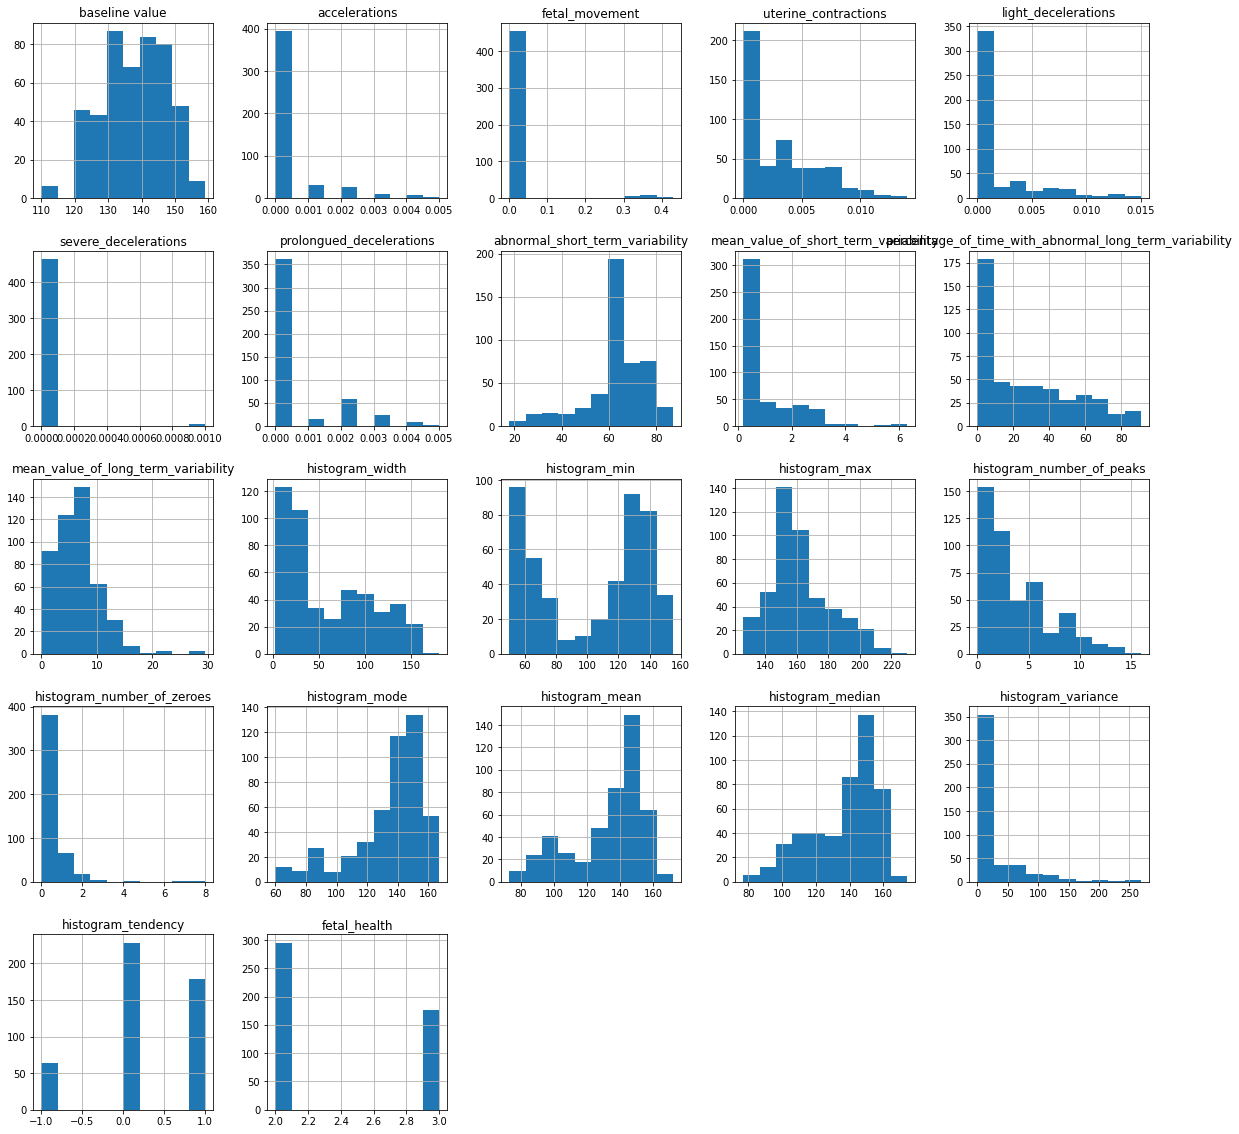

In [10]:
# Plotagem de histograma apenas para casos suspeitos e patológicos
df.loc[df.fetal_health != 1].hist(figsize=(20,20))

plt.show()

Aparentemente, os fetos que possui uma frequência cardíaca maior que 120, uma variabilidade anormal de curto prazo próximo ao 60 e uma média de variabilidade de longo prazo entre 5 e 10 têm mais chances de desenvolverem algum problema.

In [11]:
# Correlação de atributos em ordem crescente apenas de suspeitos e patológicos
df.loc[df.fetal_health != 1].corr()['fetal_health'].sort_values()

histogram_mean                                           -0.688764
histogram_median                                         -0.678460
histogram_mode                                           -0.648398
baseline value                                           -0.495425
mean_value_of_long_term_variability                      -0.484578
histogram_min                                            -0.403451
histogram_tendency                                       -0.363645
percentage_of_time_with_abnormal_long_term_variability   -0.113504
histogram_max                                            -0.003266
histogram_number_of_zeroes                                0.065576
accelerations                                             0.067462
abnormal_short_term_variability                           0.099182
fetal_movement                                            0.134552
severe_decelerations                                      0.147063
histogram_number_of_peaks                                 0.16

Observamos aqui que as maiores correlações positivas para a saúde do feto estão relacionadas ao valor médio da variação de curto prazo, variação do histograma, desaceleração leve e desaceração prolongada. Já as correlações negativas englobam a média, mediana e modo do histograma, bem como a frequência Cardíaca Fetal Basal e a média dos valores de variação de longo prazo.

Agora iremos analizar o balanceamento de nossa coluna *Target* através da plotagem de um gráfico de barras.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


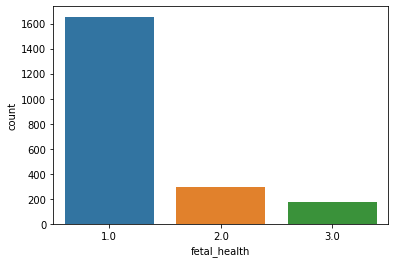

In [ ]:
# Plotagem de gráfico de barras relacionado à saúde fetal
sns.countplot(df.fetal_health)

Vemos aqui um desbalanceamento de valores, ou seja, muitos casos classificados como normal e poucos como suspeitos ou patológicos. Isso é bom na vida real, mas para nosso modelo de previsão, é como se não tivesse exemplos de casos diferentes de normal, dificultando seu aprendizado no diz respeito a anormalidade. 

Verificaremos a seguir a presença de outliers em nosso *dataset* através da plotagem de boxplots.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

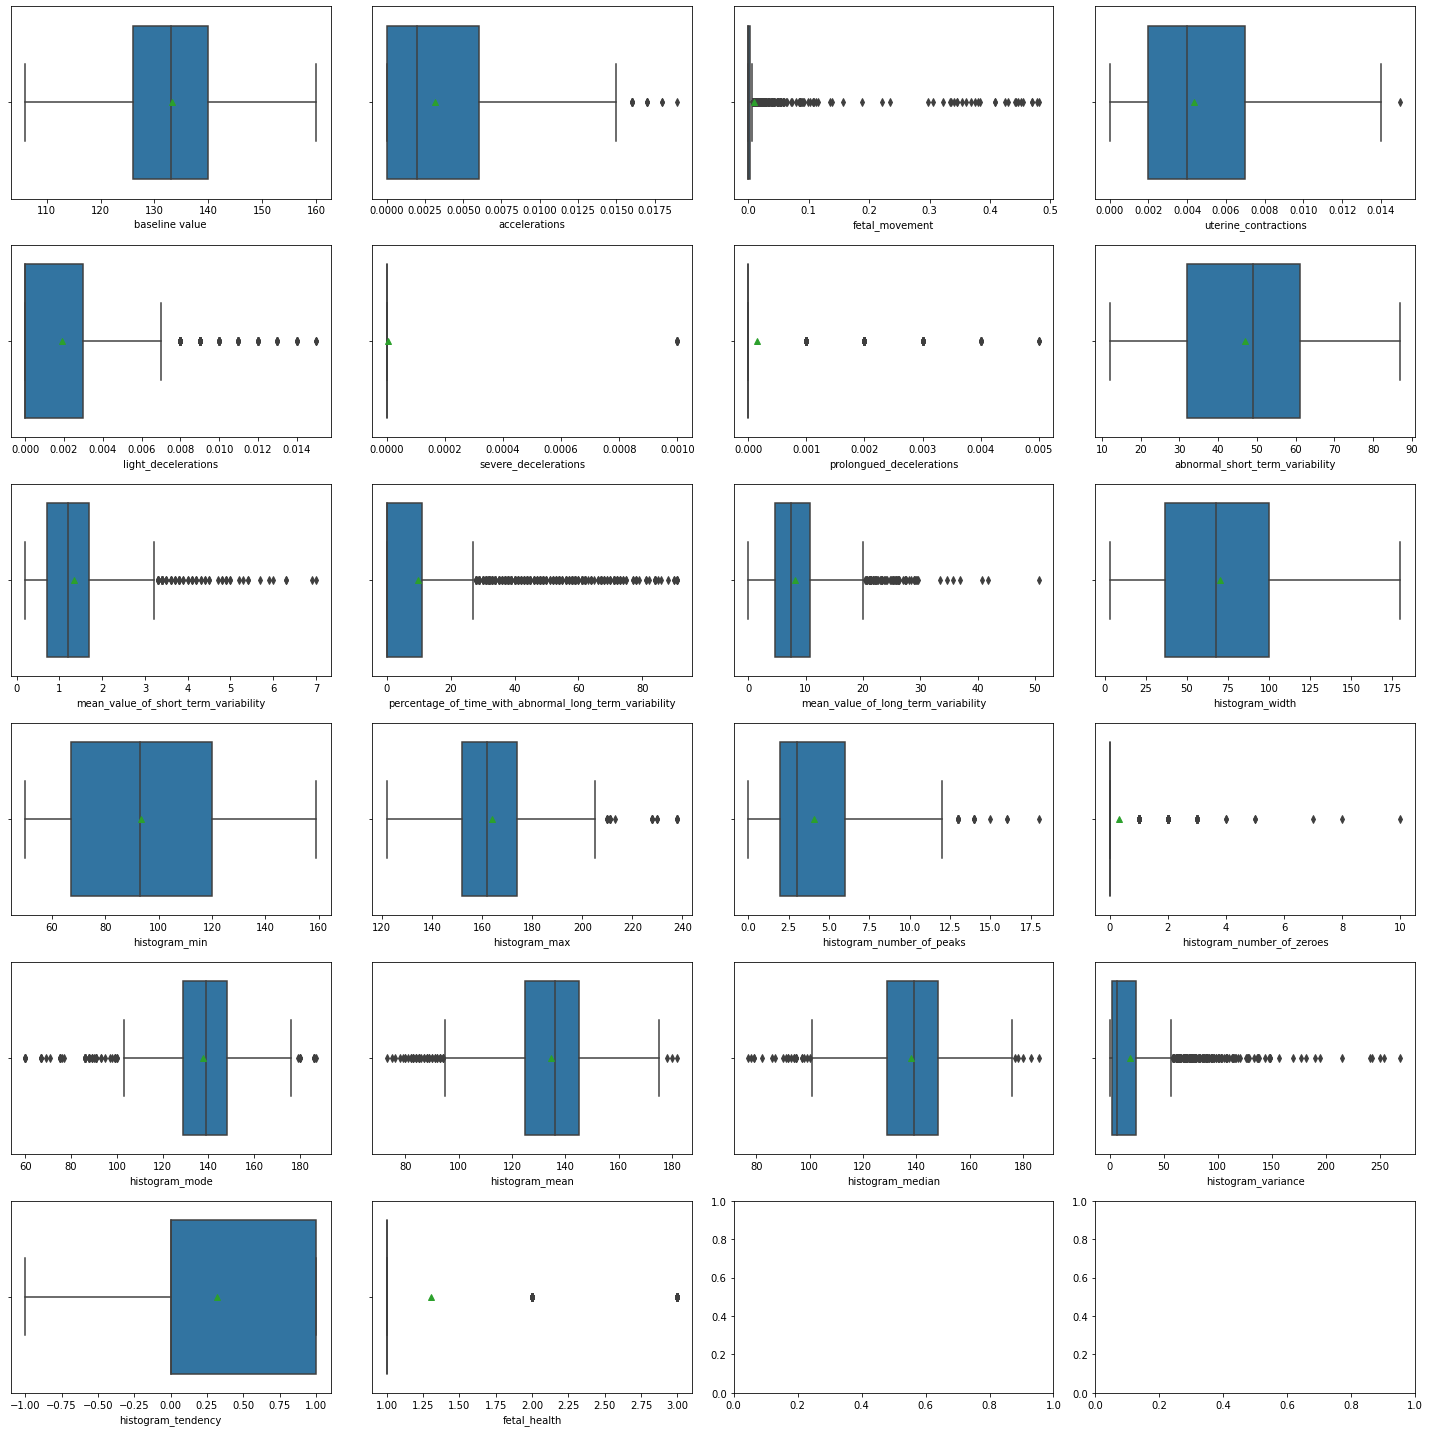

In [ ]:
# Configuração para plotagem
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20,20))

linha = 0
col = 0

# Plotagem de boxplots
for i in df.columns:
  sns.boxplot(df[i],ax=ax[linha][col],showmeans=True)
  col +=1
  if col > 3:
    linha +=1
    col = 0
    if linha > 5:
      break

plt.tight_layout()
plt.show()

É clara a presença de *outliers* em diversos atributos, porém devemos tomar um pouco de cuidado aqui. Como nosso *dataset* possui muitos valores zerados ou próximo de zero, qualquer valor que seja diferente pode ser classificado como *outlier*. Ou seja, esse valores diferentes podem ser cruciais na classificação.

## ***Preparando o Terreno***
________________________________________________________________________________

Nesta etapa, realizaremos uma cópia de nosso *dataset* original e separaremos 20% das entradas para teste. Os outros 80% serão utilizados para treino diretamente no Pycaret.

In [4]:
# Cópia do dataset original
df_wk = df.copy()

print("O dataset possui {} linhas e {} colunas".format(df_wk.shape[0],df_wk.shape[1]))

O dataset possui 2126 linhas e 22 colunas


In [5]:
# Definição do dataset de teste
df_teste = df_wk.sample(frac=0.2, random_state=0)

print("O dataset de teste possui {} linhas e {} colunas".format(df_teste.shape[0],df_teste.shape[1]))


O dataset de teste possui 425 linhas e 22 colunas


In [6]:
# Definição do dataset de treino
df_treino = df_wk.drop(df_teste.index)

print("O dataset de treino possui {} linhas e {} colunas".format(df_treino.shape[0],df_treino.shape[1]))

O dataset de treino possui 1701 linhas e 22 colunas


Em testes realizados previamente, verificamos a necessidade da transformação da coluna 'fetal_health' em categórica do tipo *string* para o correto funcionamento do Pycaret.

In [7]:
# Transformação da coluna categórica
df_treino['fetal_health'] = df_treino['fetal_health'].map({1.0: 'low', 2.0: 'med', 3.0: 'high'})

In [17]:
# Contagem de valores
df_treino.fetal_health.value_counts()

low     1330
med      237
high     134
Name: fetal_health, dtype: int64

In [8]:
# Reset dos índices de ambos os datasets
df_teste.reset_index(inplace=True)
df_treino.reset_index(inplace=True)

## ***Utilizando o Pycaret***
________________________________________________________________________________

O Pycaret é uma biblioteca que necessita de instalação. Portanto, com os comandos abaixo, iremos instalar a bilioteca e importar os componentes necessários para a execução no Collab.

In [9]:
# Instalação da biblioteca
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.5 MB/s eta 0:00:

In [10]:
# Importação de utilitário para funcionamento no Collab
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab()>

In [12]:
# Importação de todos os módulos
from pycaret.classification import *

Pycaret necessita de uma triagem inicial, onde informamos nosso *dataset* de treino e nosso atributo alvo. A partir dessa primeira análise, ele nos retorna uma tabela de parâmetros que podem ser modificados de acordo com as necessidades de tratamento.

In [13]:
# Setup inicial do Pycaret
clf = setup (data = df_treino, target = 'fetal_health')

,Description,Value
0,session_id,6782
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, med: 2"
4,Original Data,"(1701, 23)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='fetal_health',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

Após analisarmos a tabela, modificaremos dois parâmetros necessários a nossa análise: Trasnformation, referente a utilização da Padronização dos valores, e Fix Imbalance, referente ao balanceamento do atributo alvo.

In [14]:
# Setup com parâmetros adicionais
clf = setup (data = df_treino, 
             target = 'fetal_health', 
             transformation = True,  
             fix_imbalance = True,
             )

,Description,Value
0,session_id,3799
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, med: 2"
4,Original Data,"(1701, 23)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='fetal_health',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                                                  target='fetal_health')),
                ('binn', 'passthrough'), ('rem_outliers', 'pa

Com os dados carregados e os parâmetros definidos, podemos utilizar o método que executa todos os algoritmos de machine learning disponíveis na ferramenta e nos retorna uma tabela com valores de diferentes métricas, ordenados por ordem decrescente a partir da métrica Accuracy e utilizando 10 folds de validação cruzada como padrão.

In [15]:
# Comparação da performance dos algoritmos
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9588,0.9933,0.9243,0.9607,0.9583,0.8882,0.8900,1.580
rf,Random Forest Classifier,0.9538,0.9913,0.9135,0.9548,0.9537,0.8757,0.8768,0.849
gbc,Gradient Boosting Classifier,0.9529,0.9914,0.9226,0.9554,0.9535,0.8750,0.8761,3.204
et,Extra Trees Classifier,0.9471,0.9880,0.8984,0.9487,0.9466,0.8565,0.8586,0.504
dt,Decision Tree Classifier,0.9202,0.9073,0.8717,0.9242,0.9201,0.7884,0.7914,0.090
ada,Ada Boost Classifier,0.9008,0.9421,0.8473,0.9085,0.9030,0.7455,0.7485,0.537
knn,K Neighbors Classifier,0.8882,0.9648,0.8751,0.9169,0.8960,0.7356,0.7492,0.089
lr,Logistic Regression,0.8857,0.9700,0.8502,0.9086,0.8928,0.7219,0.7310,0.737
ridge,Ridge Classifier,0.8782,0.0000,0.8551,0.9139,0.8870,0.7151,0.7326,0.056
svm,SVM - Linear Kernel,0.8748,0.0000,0.8363,0.9030,0.8828,0.7004,0.7122,0.110


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3799, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Como mostrado na tabela, os três melhores modelos que performaram com um número maior na métrica Accuracy foram: *Light Gradient Boosting Machine*, *Random Forest Classifier* e *Gradient Boosting Classifier*. Podemos printar o melhor modelo e os parâmetros utilizados.

In [16]:
# Parâmetros do melhor modelo
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3799, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Apesar de verificarmos os melhores modelos com o método acima, ele não nos retorna modelos treinados. É apenas um ponto de partida para a escolha do melhor modelo. Desta maneira, utilizaremos os comandos abaixo para instanciar os nossos três melhores modelos.

In [17]:
# Instanciamento do Light Gradient Boosting Machine	
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9496,0.9932,0.8824,0.9567,0.9462,0.8554,0.8611
1,0.9580,0.9905,0.9166,0.9594,0.9583,0.8841,0.8843
2,0.9496,0.9883,0.9463,0.9527,0.9507,0.8692,0.8701
3,0.9496,0.9915,0.8549,0.9482,0.9472,0.8572,0.8612
4,0.9664,0.9988,0.9216,0.9679,0.9645,0.9065,0.9097
5,0.9664,0.9970,0.9398,0.9672,0.9667,0.9116,0.9118
6,0.9580,0.9887,0.9499,0.9592,0.9585,0.8895,0.8897
7,0.9664,0.9935,0.9398,0.9689,0.9670,0.9115,0.9120
8,0.9664,0.9943,0.9695,0.9689,0.9671,0.9128,0.9138


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3799, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [18]:
# Instanciamento do Gradient Boosting Classifier
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9496,0.9933,0.8809,0.9492,0.9487,0.8593,0.8599
1,0.9076,0.9857,0.8456,0.9133,0.9094,0.7524,0.7536
2,0.9496,0.9878,0.9463,0.9527,0.9507,0.8692,0.8701
3,0.9580,0.9904,0.8905,0.9572,0.9574,0.8861,0.8864
4,0.9832,0.9998,0.9608,0.9840,0.9829,0.9546,0.9552
5,0.9580,0.9984,0.9362,0.9605,0.9587,0.8910,0.8920
6,0.9328,0.9875,0.9390,0.9416,0.9356,0.8302,0.8337
7,0.9664,0.9919,0.9535,0.9664,0.9664,0.9103,0.9103
8,0.9664,0.9919,0.9695,0.9689,0.9671,0.9128,0.9138


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3799, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
# Instanciamento do Random Forest Classifier	
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9580,0.9925,0.8671,0.9566,0.9564,0.8787,0.8811
1,0.9412,0.9831,0.8934,0.9430,0.9418,0.8377,0.8379
2,0.9328,0.9857,0.9071,0.9333,0.9328,0.8234,0.8236
3,0.9412,0.9896,0.8513,0.9391,0.9393,0.8359,0.8380
4,0.9664,0.9986,0.9078,0.9656,0.9654,0.9077,0.9088
5,0.9664,0.9971,0.9558,0.9700,0.9670,0.9127,0.9141
6,0.9328,0.9881,0.9231,0.9374,0.9344,0.8282,0.8299
7,0.9748,0.9929,0.9572,0.9750,0.9746,0.9328,0.9330
8,0.9496,0.9888,0.9463,0.9527,0.9507,0.8692,0.8701


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3799, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


O Pycaret nos dá a liberdade de testar quantos algoritmos quisermos sem um total aprofundamento, desde que ele esteja presente em sua biblioteca. 

Instanciado os modelos, iremos realizar o *tuning* de parâmetros para podermos obter os melhores valores para Accuracy.

In [20]:
# Tuning de parâmetros do Gradient Boosting Regressor
lightgbm_tuned = tune_model(lightgbm, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9919,0.8774,0.9396,0.9399,0.8331,0.8341
1,0.9328,0.9806,0.8724,0.9359,0.9339,0.8202,0.8211
2,0.9496,0.9834,0.9463,0.9527,0.9507,0.8692,0.8701
3,0.9664,0.9960,0.9101,0.9675,0.9659,0.9088,0.9095
4,0.9832,0.9981,0.9768,0.9840,0.9833,0.9552,0.9554
5,0.9748,0.9980,0.9891,0.9773,0.9752,0.9356,0.9375
6,0.9076,0.9866,0.9282,0.9245,0.9122,0.7759,0.7844
7,0.9664,0.9912,0.9535,0.9664,0.9664,0.9103,0.9103
8,0.9244,0.9898,0.9194,0.9311,0.9268,0.8064,0.8084


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=110, n_jobs=-1, num_leaves=20, objective=None,
               random_state=3799, reg_alpha=0.005, reg_lambda=1e-07,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [21]:
# Tuning de parâmetros do Random Forest Regressor
gbc_tuned = tune_model(gbc, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9328,0.9931,0.8243,0.9302,0.9303,0.8063,0.8087
1,0.9160,0.9769,0.8171,0.9154,0.9144,0.7570,0.7591
2,0.9496,0.9855,0.9463,0.9527,0.9507,0.8692,0.8701
3,0.9580,0.9922,0.9202,0.9580,0.9580,0.8879,0.8879
4,0.9832,0.9977,0.9768,0.9840,0.9834,0.9558,0.9561
5,0.9832,0.9984,0.9928,0.9850,0.9836,0.9564,0.9574
6,0.9412,0.9873,0.9427,0.9469,0.9431,0.8494,0.8515
7,0.9748,0.9917,0.9572,0.9744,0.9745,0.9318,0.9321
8,0.9580,0.9869,0.9499,0.9592,0.9585,0.8895,0.8897


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [22]:
# Tuning de parâmetros do Light Gradient Boosting Machine
rf_tuned = tune_model(rf, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9328,0.9911,0.8417,0.9293,0.9288,0.8032,0.8077
1,0.9328,0.9859,0.8724,0.9388,0.9339,0.8170,0.8181
2,0.9328,0.9853,0.9071,0.9333,0.9328,0.8234,0.8236
3,0.9328,0.9932,0.8179,0.9299,0.9310,0.8152,0.8161
4,0.9916,0.9994,0.9804,0.9924,0.9917,0.9776,0.9778
5,0.9496,0.9980,0.9326,0.9535,0.9508,0.8711,0.8729
6,0.9160,0.9863,0.9158,0.9270,0.9195,0.7909,0.7954
7,0.9580,0.9921,0.9202,0.9593,0.9585,0.8895,0.8897
8,0.9580,0.9902,0.9499,0.9592,0.9585,0.8895,0.8897


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=3799, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


Observamos que, apenas para o Gradient Boosting Classifier, o *tuning* de parâmetros aumentou a performance se comparado ao primeiro instanciamento. 

Sendo assim, iremos utilizá-lo. Abaixo, os melhores parâmetros utilizados.



In [23]:
# Parâmetros definidos após o tuning 
print(gbc_tuned)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)


Com o modelo escolhido, podemos plotar vários gráficos e analisá-los de forma mais profunda.

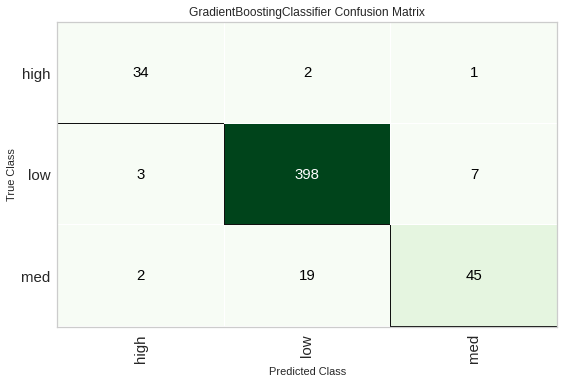

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
# Gráfico de erro
plot_model(gbc_tuned, plot='confusion_matrix')

Neste gráfico, podemos verificar a matriz confusão com os acertos, falsos positivos e falsos negativos.

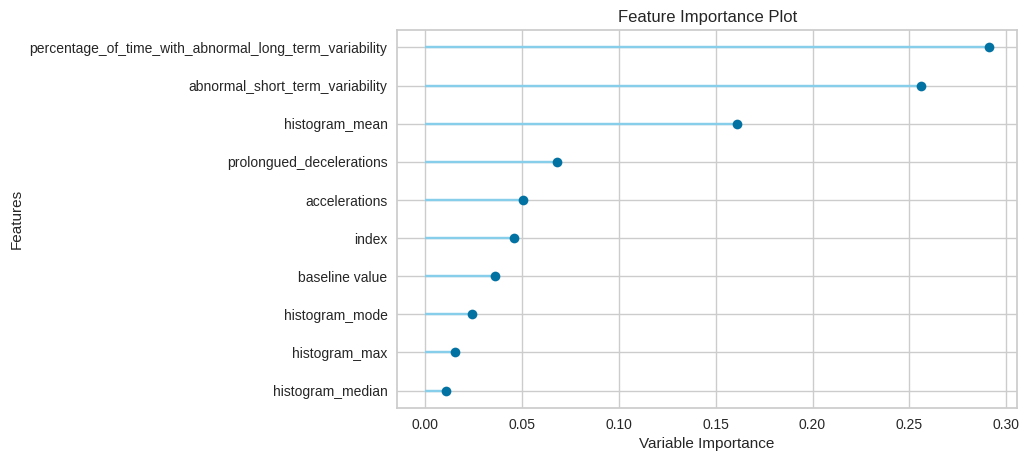

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
# Gráfico de importância de atributo
plot_model(gbc_tuned, plot='feature')

Segundo o modelo, os atributos mais importantes para as previsões foram o 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability' e 'histogram_mean'. 

In [26]:
# Opções de gráficos
evaluate_model(gbc_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Na tabela acima podemos ver a evolução de umas das métricas.

Com o comando abaixo, podemos realizar as predições pelo conjunto de dados de treino e verificar a performance final. Neste caso, o Accuracy ficou em torno de 0,93. Na tabela, também é criado uma nova coluna chamada 'Label' com os valores das predições e uma coluna chamada 'score' com a pontuação da previsão.

In [27]:
# Predições
predict_model(gbc_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preload

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9335,0.9559,0.8587,0.9312,0.931,0.7961,0.7983


,index,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,severe_decelerations_0.0010000000474974513,fetal_health,Label,Score
0,-1.447398,-0.640803,-0.981687,0.727992,-1.501597,-0.800508,-0.306186,0.884845,-1.145072,0.742929,...,-0.550728,-0.640754,-0.515303,-0.625297,-1.133424,1.131632,0.0,med,low,0.8223
1,1.143280,1.005494,-0.981687,-0.583371,-0.438149,-0.800508,-0.306186,1.160784,-1.670338,0.847313,...,-0.550728,0.487647,0.671808,0.598670,-1.133424,-0.574148,0.0,low,low,0.9973
2,-0.433541,-0.947304,1.368766,2.913308,1.216853,-0.800508,-0.306186,-0.361206,0.227207,-0.812732,...,1.793174,0.793164,0.671808,0.922779,0.325919,-0.574148,0.0,low,low,0.9986
3,-1.789777,0.592144,-0.029732,0.274801,-1.501597,0.938438,-0.306186,0.212375,1.112242,-0.812732,...,1.886069,0.562541,0.079846,0.441889,1.374439,-0.574148,0.0,med,low,0.9999
4,-1.116206,0.179957,-0.981687,0.925091,-0.438149,-0.800508,-0.306186,0.773810,-1.145072,1.352984,...,-0.550728,-0.076760,-0.058760,-0.150783,-0.577226,1.131632,0.0,med,med,0.9985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.504364,-0.025691,-0.981687,-0.583371,-0.095717,-0.800508,-0.306186,1.543433,-1.393864,1.216138,...,-0.550728,-0.208439,0.079846,-0.007721,-1.133424,-0.574148,0.0,low,low,0.9994
507,0.828127,-0.128401,-0.981687,-0.583371,-0.438149,0.938438,-0.306186,-0.771641,-0.191221,0.992174,...,1.793174,-0.208439,-0.193699,-0.150783,-0.039746,1.131632,0.0,low,low,0.9992
508,1.110625,-1.253080,1.064819,0.511840,-0.095717,1.536006,-0.306186,0.494456,0.862788,-0.812732,...,1.793174,-0.923225,-0.928853,-0.816417,1.121688,-0.574148,0.0,low,low,1.0000
509,-0.804326,2.565431,1.576824,2.771315,-0.438149,-0.800508,-0.306186,-0.419346,-0.351887,-0.812732,...,-0.550728,4.313787,4.261956,4.392933,0.129405,1.131632,0.0,low,low,0.9996


Podemos observar também pela tabela acima a eficácia dos métodos que foram instanciados no setup para a transformação dos dados. Podemos reparar nos valores padronizados e a utilização do One Hot Encoding para as variáveis categóricas.

O procedimento do Pycaret nos orienta a finalizar o processo através de um método para depois aplicar o modelo nos dados de teste.

In [28]:
# Finalização do procedimento
final_gbc = finalize_model(gbc_tuned)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
         

Procedimento finalizado, podemos novamente realizar as previsões nos dados de treino. Verificamos assim um aumento para 1,0 da métrica Accuracy, bem como em todas as outras métricas. Isso pode indicar que nosso modelo está em overfitting e pode não ser adequado para entrar em produção. Mesmo assim, iremos dar continuidade nos procedimentos e verificar o resulado final. Podemos verificar também os parâmetros finais utilizados.

In [30]:
# Predições de treino finais
predict_model(final_gbc)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preload

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,index,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,severe_decelerations_0.0010000000474974513,fetal_health,Label,Score
0,-1.447398,-0.640803,-0.981687,0.727992,-1.501597,-0.800508,-0.306186,0.884845,-1.145072,0.742929,...,-0.550728,-0.640754,-0.515303,-0.625297,-1.133424,1.131632,0.0,med,med,0.9855
1,1.143280,1.005494,-0.981687,-0.583371,-0.438149,-0.800508,-0.306186,1.160784,-1.670338,0.847313,...,-0.550728,0.487647,0.671808,0.598670,-1.133424,-0.574148,0.0,low,low,0.9952
2,-0.433541,-0.947304,1.368766,2.913308,1.216853,-0.800508,-0.306186,-0.361206,0.227207,-0.812732,...,1.793174,0.793164,0.671808,0.922779,0.325919,-0.574148,0.0,low,low,0.9995
3,-1.789777,0.592144,-0.029732,0.274801,-1.501597,0.938438,-0.306186,0.212375,1.112242,-0.812732,...,1.886069,0.562541,0.079846,0.441889,1.374439,-0.574148,0.0,med,med,0.9566
4,-1.116206,0.179957,-0.981687,0.925091,-0.438149,-0.800508,-0.306186,0.773810,-1.145072,1.352984,...,-0.550728,-0.076760,-0.058760,-0.150783,-0.577226,1.131632,0.0,med,med,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.504364,-0.025691,-0.981687,-0.583371,-0.095717,-0.800508,-0.306186,1.543433,-1.393864,1.216138,...,-0.550728,-0.208439,0.079846,-0.007721,-1.133424,-0.574148,0.0,low,low,0.9996
507,0.828127,-0.128401,-0.981687,-0.583371,-0.438149,0.938438,-0.306186,-0.771641,-0.191221,0.992174,...,1.793174,-0.208439,-0.193699,-0.150783,-0.039746,1.131632,0.0,low,low,0.9990
508,1.110625,-1.253080,1.064819,0.511840,-0.095717,1.536006,-0.306186,0.494456,0.862788,-0.812732,...,1.793174,-0.923225,-0.928853,-0.816417,1.121688,-0.574148,0.0,low,low,1.0000
509,-0.804326,2.565431,1.576824,2.771315,-0.438149,-0.800508,-0.306186,-0.419346,-0.351887,-0.812732,...,-0.550728,4.313787,4.261956,4.392933,0.129405,1.131632,0.0,low,low,0.9999


In [31]:
# Parâmetros finais utilizados
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)


Com o modelo pronto, iremos utilizá-lo nos dados de teste e verificar a performance.

In [32]:
# Predições nos dados de teste
unseen_predictions = predict_model(final_gbc, data=df_teste)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=4,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           presort='deprecated', random_state=3799,
                           subsample=0.75, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preload

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8518,0.1555,0.4378,0.8528,0.8521,0.6223,0.6387


,index,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Label,Score
0,658,130.0,0.001,0.000,0.004,0.000,0.0,0.0,24.0,1.2,...,1.0,0.0,134.0,133.0,135.0,1.0,0.0,1.0,low,0.9999
1,1734,134.0,0.008,0.001,0.007,0.004,0.0,0.0,59.0,1.2,...,6.0,0.0,150.0,146.0,150.0,33.0,0.0,1.0,low,0.9999
2,1226,125.0,0.001,0.000,0.004,0.000,0.0,0.0,43.0,0.7,...,0.0,0.0,131.0,130.0,132.0,1.0,0.0,1.0,low,0.9996
3,1808,143.0,0.000,0.000,0.001,0.000,0.0,0.0,69.0,0.3,...,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1.0,low,0.9940
4,825,152.0,0.000,0.000,0.005,0.000,0.0,0.0,62.0,0.4,...,0.0,0.0,159.0,156.0,158.0,1.0,1.0,2.0,med,0.8284


Mesmo com indícios de overfitting, nosso modelo atingiu um valor de 0,8518 na métrica Accuracy. Algumas outras métricas não tiveram um bom desempenho, como a AUC e o Recall. Neste momento, o ideal seria verificar os motivos do overfitting dos dados de treino e refazer todo o procedimento para elevar os resultados das métricas. Como nosso intuito aqui é mostrar o uso da ferramenta Pycaret, daremos como finalizado esse estudo.

## ***Conclusão***
________________________________________________________________________________

Percebe-se que a ferramenta Pycaret nos auxilia e muito na preparação dos dados e nos testes de algoritmo. Com poucos comandos, é possível verificar várias métricas de diversos modelos e utilizar as melhores combinações para a criação de um modelo performático. Apesar de toda essa praticidade, é de extrema importância o conhecimento de todo o processo por parte do cientista de dados, uma vez que os algoritmos podem fazer certas considerações que não fazem sentido dentro da linha de raciocínio.

Com essa otimização de tempo, a análise exploratória dos dados pode ser realizada de maneira mais detalhada, com geração de insghts que extrapolam o âmbito da previsão de resultados por métodos de classificação.

Neste caso, mesmo com a possibilidade de tantas verificações e escolhas de parâmetros, nosso modelo sofreu overfitting. A decisão de uma revisão ou continuidade fica na mãos do cientista de dados em conjunto com o cliente.